In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import our input dataset
environ_happ = pd.read_csv('Resources/environment_happiness.csv')
environ_happ.head()

,Unnamed: 0,Country,Code,Year,Annual_CO2_emission_tonnes,Life_ladder,Basic_drinking_water,Air_pollutant_pm2.5
0,0,Afghanistan,AFG,2008,4198329.64,3.724,43.31,NaN
1,1,Afghanistan,AFG,2009,6760313.49,4.402,45.78,NaN
2,2,Afghanistan,AFG,2010,8452224.14,4.758,48.29,49.80
3,3,Afghanistan,AFG,2011,12226017.38,3.832,50.83,50.30
4,4,Afghanistan,AFG,2012,10742056.72,3.783,53.40,54.67


In [3]:
# Dropping the Unamed and code columns
df = environ_happ.drop(columns=['Unnamed: 0', 'Code'], axis=1)

In [5]:
df.head()

,Country,Year,Annual_CO2_emission_tonnes,Life_ladder,Basic_drinking_water,Air_pollutant_pm2.5
0,Afghanistan,2008,4198329.64,3.724,43.31,NaN
1,Afghanistan,2009,6760313.49,4.402,45.78,NaN
2,Afghanistan,2010,8452224.14,4.758,48.29,49.80
3,Afghanistan,2011,12226017.38,3.832,50.83,50.30
4,Afghanistan,2012,10742056.72,3.783,53.40,54.67


In [10]:
newdf = df.groupby("Country")["Annual_CO2_emission_tonnes"].sum()
newdf

Country
Afghanistan    9.754862e+07
Albania        4.848337e+07
Algeria        3.984682e+08
Angola         1.301587e+08
Argentina      1.943743e+09
                   ...     
Venezuela      1.788490e+09
Vietnam        9.908540e+08
Yemen          1.527783e+08
Zambia         3.251967e+07
Zimbabwe       9.261441e+07
Name: Annual_CO2_emission_tonnes, Length: 148, dtype: float64

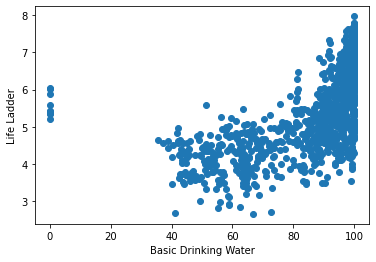

In [13]:
plt.scatter(df.Basic_drinking_water, df.Life_ladder)
plt.xlabel('Basic Drinking Water')
plt.ylabel('Life Ladder')
plt.show()

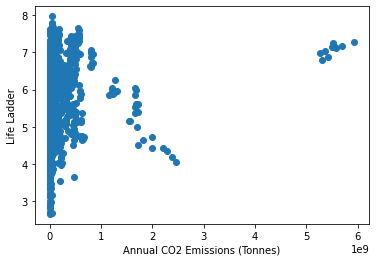

In [14]:
plt.scatter(df.Annual_CO2_emission_tonnes, df.Life_ladder)
plt.xlabel('Annual CO2 Emissions (Tonnes)')
plt.ylabel('Life Ladder')
plt.show()

In [25]:
X = df.Annual_CO2_emission_tonnes.values.reshape(-1,1)
X.shape
y = df.Life_ladder

In [24]:
df.isnull().sum()

Country                         0
Year                            0
Annual_CO2_emission_tonnes      0
Life_ladder                     0
Basic_drinking_water          112
Air_pollutant_pm2.5           408
dtype: int64

In [26]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(1169,)


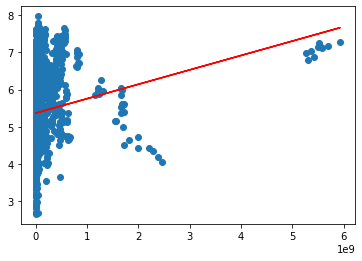

In [27]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()